**Project 3**

Kanishka Gairola

045025

**Project Report**

Objectives : Based on the features provided in your dataset, here are some potential objectives for conducting Customer Personality Analysis:

1. **Customer Segmentation**: Identify distinct customer segments based on demographics.

2. **Understanding Customer Needs**: Gain insights into the preferences, behaviors, and concerns of different customer segments and understand their motivations for purchasing products and engaging with the company.

3. **Optimizing Marketing Strategies**: Tailor marketing strategies and campaigns to target specific customer segments more effectively. Determine which marketing channels (e.g., website, catalog, store) are most effective for different customer segments.

4. **Product Development and Customization**: Use customer insights to refine existing products or develop new ones that better meet the needs and preferences of target customer segments. For example, adjust product features, pricing, or packaging to appeal to different customer groups.

5. **Improving Customer Experience**: Identify opportunities to enhance the overall customer experience, such as by offering personalized promotions, improving customer service based on common complaints, or optimizing the online shopping experience.

**Data Description**
The dataset contains a total of 29 columns and 2240 rows. It contains a mix of categorical and non-categorical data that can be used to gain deeper insights regarding the customers, thier behaviours and shopping patterns.

Categorical Variables:  Education, Marital_Status, Kidhome, Teenhome, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1,AcceptedCmp2, Complain, Response
Non-Categorical Variables: Id, Year_Birth, Income, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts,MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue

**Data Preprocessing**

Missing data treatment: Imputation of missing values using descriptive statistics such as mean for numerical variables and mode for categorical variables.
Outlier detection and treatment: Identification and handling of outliers in non-categorical variables.
Normalization and log transformation: Transformation techniques applied to prepare the data for modeling.
Missing data treatment involves filling in missing values using statistical measures like mean for numerical variables and mode for categorical variables. This ensures that the dataset remains complete and usable for analysis, preventing the loss of valuable information due to missing observations. Outlier detection identifies extreme values in non-categorical variables that deviate significantly from the majority of data points. Handling outliers involves either removing them or transforming them to reduce their impact on statistical analyses and predictive models, ensuring more robust and accurate results.

Normalization standardizes the scale of numerical variables, bringing them to a common scale to facilitate fair comparisons and interpretation. Log transformation is a technique applied to skewed data distributions to make them more symmetrical, improving the performance of certain statistical analyses and machine learning algorithms. These preprocessing steps are essential for preparing the data for modeling, ensuring that it meets the assumptions and requirements of statistical techniques and machine learning algorithms. By addressing missing data, outliers, and skewed distributions, preprocessing enhances the quality and reliability of subsequent analyses and predictions.

Overall, data preprocessing plays a crucial role in ensuring the integrity and usability of the dataset for analytical purposes. It lays the foundation for accurate modeling and meaningful insights, ultimately contributing to informed decision-making and improved outcomes in various domains.

**Data Analysis**

K-Means Clustering: The evaluation metrics provide valuable insights into the effectiveness of the clustering algorithm with 5 clusters. The Silhouette Score, measuring the cohesion and separation of clusters, yields a value of 0.2775, indicating a moderate level of similarity within clusters and distinction between them. On the other hand, the Davies-Bouldin Score, which assesses the similarity of clusters relative to each other, returns a score of 1.2908, suggesting that the clusters are reasonably separated and have similar sizes. These metrics collectively indicate that the clustering with 5 clusters demonstrates a satisfactory level of grouping, with clusters showing discernible boundaries and comparable characteristics. Overall, these evaluations suggest that the clustering algorithm has effectively partitioned the data into distinct groups, providing valuable insights into the underlying structure of the dataset.

Decision Tree & Random Forest: The accuracy scores for the Decision Tree Classifier and the Random Forest Classifier are 0.84375 and 0.8660714285714286, respectively. These scores represent the proportion of correctly predicted instances by each model. The higher accuracy score of the Random Forest Classifier (0.8661) compared to the Decision Tree Classifier (0.84375) suggests that the Random Forest model performs slightly better in making accurate predictions on the given dataset.

XGBoost :The XGBoost classifier achieved an overall accuracy of 86.6%, indicating its decent performance. However, it excelled in identifying non-response instances (class 0) with high precision (89%) and recall (96%), but struggled with response instances (class 1), showing lower precision (62%) and recall (35%). Consequently, the F1-score for class 1 is notably lower (0.44) compared to class 0 (0.92). Despite these disparities, weighted average metrics provide a balanced assessment, considering the support for each class. In summary, while the model performs well in some areas, particularly in identifying non-response cases, there's a clear need for improvement in accurately capturing response instances.




**Managerial Insights**

The clustering analysis suggests that the customer base can be segmented into distinct groups based on their characteristics and behaviors. This information can be valuable for targeted marketing strategies, product customization, and customer relationship management initiatives.

The classification models indicate that it is possible to predict customer responses to marketing campaigns with a reasonable degree of accuracy using the available features. This insight can help optimize marketing efforts by targeting specific customer segments more effectively and allocating resources efficiently.

By leveraging advanced analytics techniques such as clustering and classification, businesses can gain valuable insights into customer behavior, preferences, and responses, ultimately driving more effective marketing strategies and enhancing overall business performance.

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
# Import & Read Dataset
data = pd.read_csv('customer_segmentation.csv')

# Display Dataset Information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [59]:
# Sample 5000 random records from the dataset
sampled_data = data.sample(n=2000, random_state=45025)

In [7]:
sampled_data.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2000.000000,2000.000000,1977.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0,2000.0,2000.000000
mean,5571.025000,1968.934500,52236.926151,0.442000,0.502500,49.380000,303.876000,26.559000,168.151500,37.939000,...,5.28450,0.074500,0.074500,0.073500,0.065000,0.01400,0.008500,3.0,11.0,0.152500
std,3226.075036,11.865606,21632.447784,0.537383,0.545108,28.936677,334.631533,40.134523,227.451365,55.143428,...,2.41795,0.262649,0.262649,0.261021,0.246588,0.11752,0.091826,0.0,0.0,0.359595
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
25%,2830.500000,1959.750000,35544.000000,0.000000,0.000000,25.000000,25.000000,1.000000,16.000000,3.000000,...,3.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
50%,5454.500000,1970.000000,51569.000000,0.000000,0.000000,50.000000,174.000000,8.000000,68.000000,12.000000,...,6.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
75%,8370.500000,1977.000000,68657.000000,1.000000,1.000000,74.000000,502.250000,33.000000,232.000000,50.000000,...,7.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.0,11.0,1.000000


In [8]:
# Step 1: Handling Missing Values

# Identify numerical and categorical columns
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = sampled_data.select_dtypes(include=['object']).columns

# Fill missing values
for col in numerical_cols:
    sampled_data[col].fillna(sampled_data[col].median(), inplace=True)

for col in categorical_cols:
    sampled_data[col].fillna(sampled_data[col].mode()[0], inplace=True)

# Step 2: Data Type Correction
# Convert numerical columns to the appropriate type and categorical columns to 'category' type
for col in numerical_cols:
    sampled_data[col] = pd.to_numeric(sampled_data[col], errors='coerce')

for col in categorical_cols:
    sampled_data[col] = sampled_data[col].astype('category')

sampled_data_info = sampled_data.info()

sampled_data_info

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1127 to 1989
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2000 non-null   int64   
 1   Year_Birth           2000 non-null   int64   
 2   Education            2000 non-null   category
 3   Marital_Status       2000 non-null   category
 4   Income               2000 non-null   float64 
 5   Kidhome              2000 non-null   int64   
 6   Teenhome             2000 non-null   int64   
 7   Dt_Customer          2000 non-null   category
 8   Recency              2000 non-null   int64   
 9   MntWines             2000 non-null   int64   
 10  MntFruits            2000 non-null   int64   
 11  MntMeatProducts      2000 non-null   int64   
 12  MntFishProducts      2000 non-null   int64   
 13  MntSweetProducts     2000 non-null   int64   
 14  MntGoldProds         2000 non-null   int64   
 15  NumDealsPurchases    20

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
# Split the data into features (X) and target (y)
X = data.drop('Response', axis=1)
y = data['Response']

# Define numerical and categorical columns
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']
categorical_cols = ['ID', 'Education', 'Marital_Status', 'Dt_Customer']

# Define the transformers for the numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit and transform the preprocessor on the dataset
X_preprocessed = preprocessor.fit_transform(X)


In [11]:
# Identify numerical columns in the dataset
numerical_features = sampled_data.select_dtypes(include=['int64', 'float64']).columns

# Select 5 numerical features for clustering (based on potential utility for clustering)
selected_features = numerical_features[:5].tolist()  # Change this based on feature selection logic

selected_features

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome']

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the selected features for clustering
clustering_data = sampled_data[selected_features]

# Standardize the features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering with k = 2, 3, 4, 5
k_values = [2, 3, 4, 5]
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=45000)
    kmeans.fit(clustering_scaled)
    kmeans_results[k] = kmeans.labels_

# Show the first 10 cluster assignments for each k
{k: labels[:10] for k, labels in kmeans_results.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{2: array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int32),
 3: array([2, 1, 0, 0, 1, 2, 0, 2, 2, 0], dtype=int32),
 4: array([3, 2, 1, 1, 2, 0, 3, 0, 0, 1], dtype=int32),
 5: array([0, 2, 1, 3, 2, 4, 0, 4, 4, 1], dtype=int32)}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the Silhouette Score is: 0.2688
For k=2, the Davies-Bouldin Score is: 1.5622


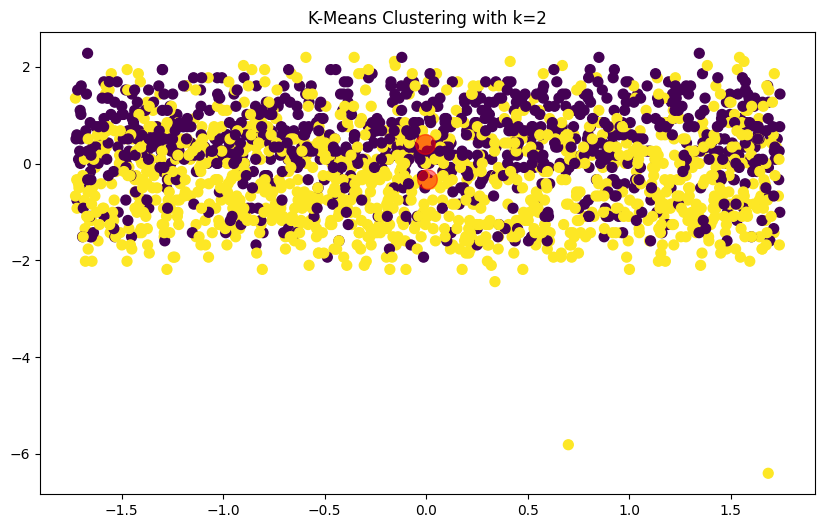

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the Silhouette Score is: 0.2776
For k=3, the Davies-Bouldin Score is: 1.3965


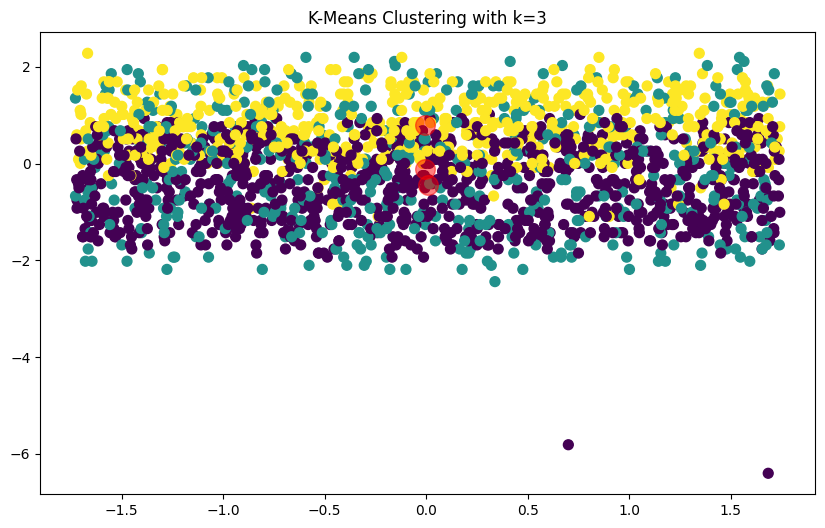

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the Silhouette Score is: 0.2987
For k=4, the Davies-Bouldin Score is: 1.3693


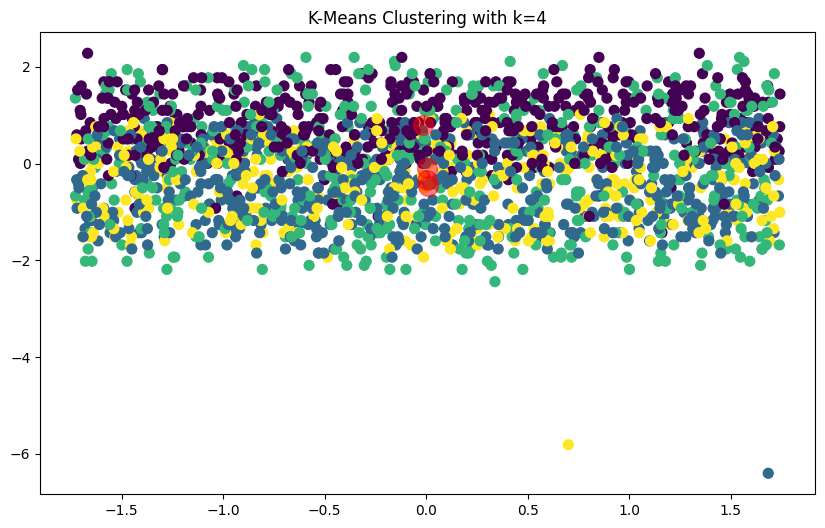

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the Silhouette Score is: 0.2775
For k=5, the Davies-Bouldin Score is: 1.2908


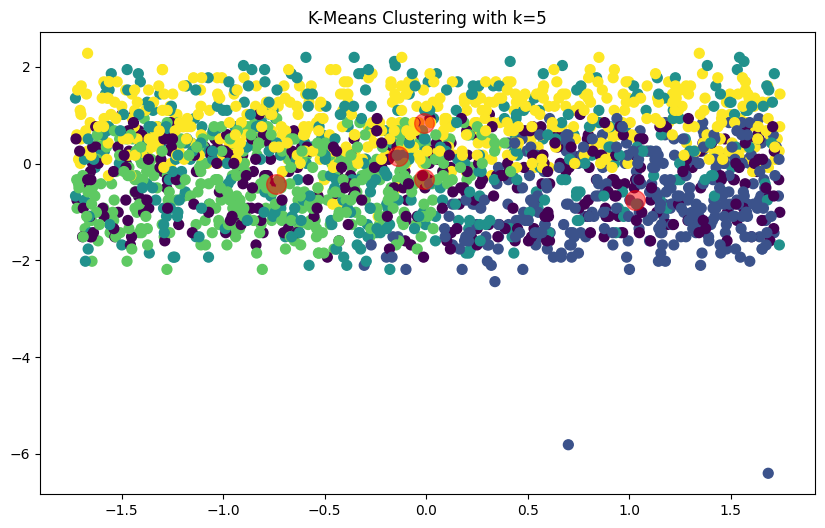

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a function to perform clustering and visualize the results
def cluster_and_evaluate(data, k_values):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=45000)
        labels = kmeans.fit_predict(data)

        # Calculate silhouette and Davies-Bouldin scores
        silhouette_avg = silhouette_score(data, labels)
        davies_bouldin_avg = davies_bouldin_score(data, labels)

        print(f"For k={k}, the Silhouette Score is: {silhouette_avg:.4f}")
        print(f"For k={k}, the Davies-Bouldin Score is: {davies_bouldin_avg:.4f}")

        # Visualize the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        plt.title(f'K-Means Clustering with k={k}')
        plt.show()

# Run the clustering and evaluation for the defined k values
cluster_and_evaluate(clustering_scaled, k_values)

In [18]:
from sklearn.impute import SimpleImputer

# Define the imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', imputer),
    ('classifier', random_forest)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8660714285714286


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np


In [46]:

# Split the preprocessed data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.20, random_state=45009, stratify=y)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

data = pd.read_csv("customer_segmentation.csv")


# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Append classifier to preprocessing pipeline
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', DecisionTreeClassifier())])

random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier())])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'Year_Birth', 'Income',
                                                   'Kidhome', 'Teenhome',
                                                   'Recency', 'MntWines',
                                                   'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurc...
                                                   'NumWebVisitsMonth',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2', 'Complain',
                                                   'Z_CostContact',
                                                   'Z_Revenue']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Dt_Customer'])])),
                ('classifier', RandomForestClassifier())])

In [49]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")


Decision Tree Classifier Accuracy: 0.84375
Random Forest Classifier Accuracy: 0.8660714285714286


In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix using ConfusionMatrixDisplay
def plot_confusion_matrix_for_model(model, X_test, y_test, title):
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    disp.ax_.set_title(f'Confusion Matrix for {title}')
    plt.show()

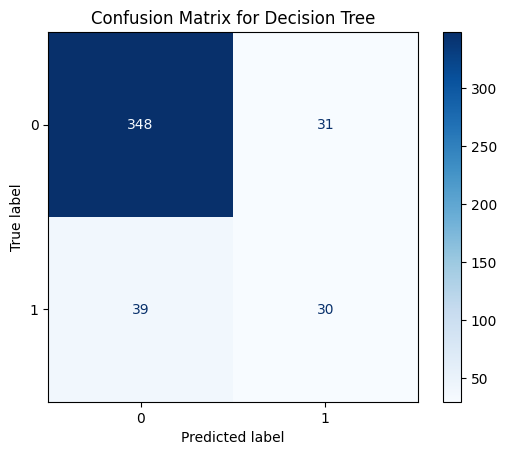

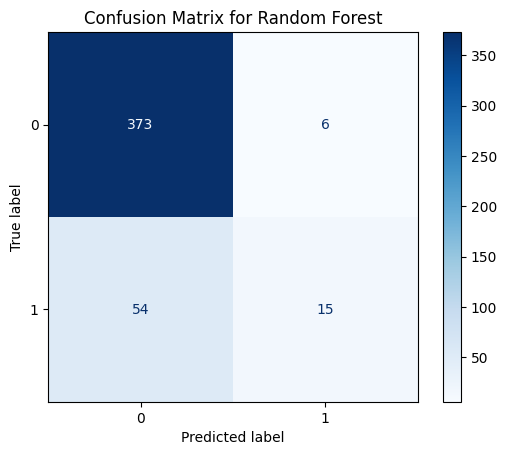

In [51]:
# Plot confusion matrices and ROC curves for both models
plot_confusion_matrix_for_model(decision_tree, X_test, y_test, 'Decision Tree')
plot_confusion_matrix_for_model(random_forest, X_test, y_test, 'Random Forest')


Number of features: 28
Features: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']
Decision tree classes: [0 1]
IndexError: list index out of range
Make sure the feature indices are within the valid range.


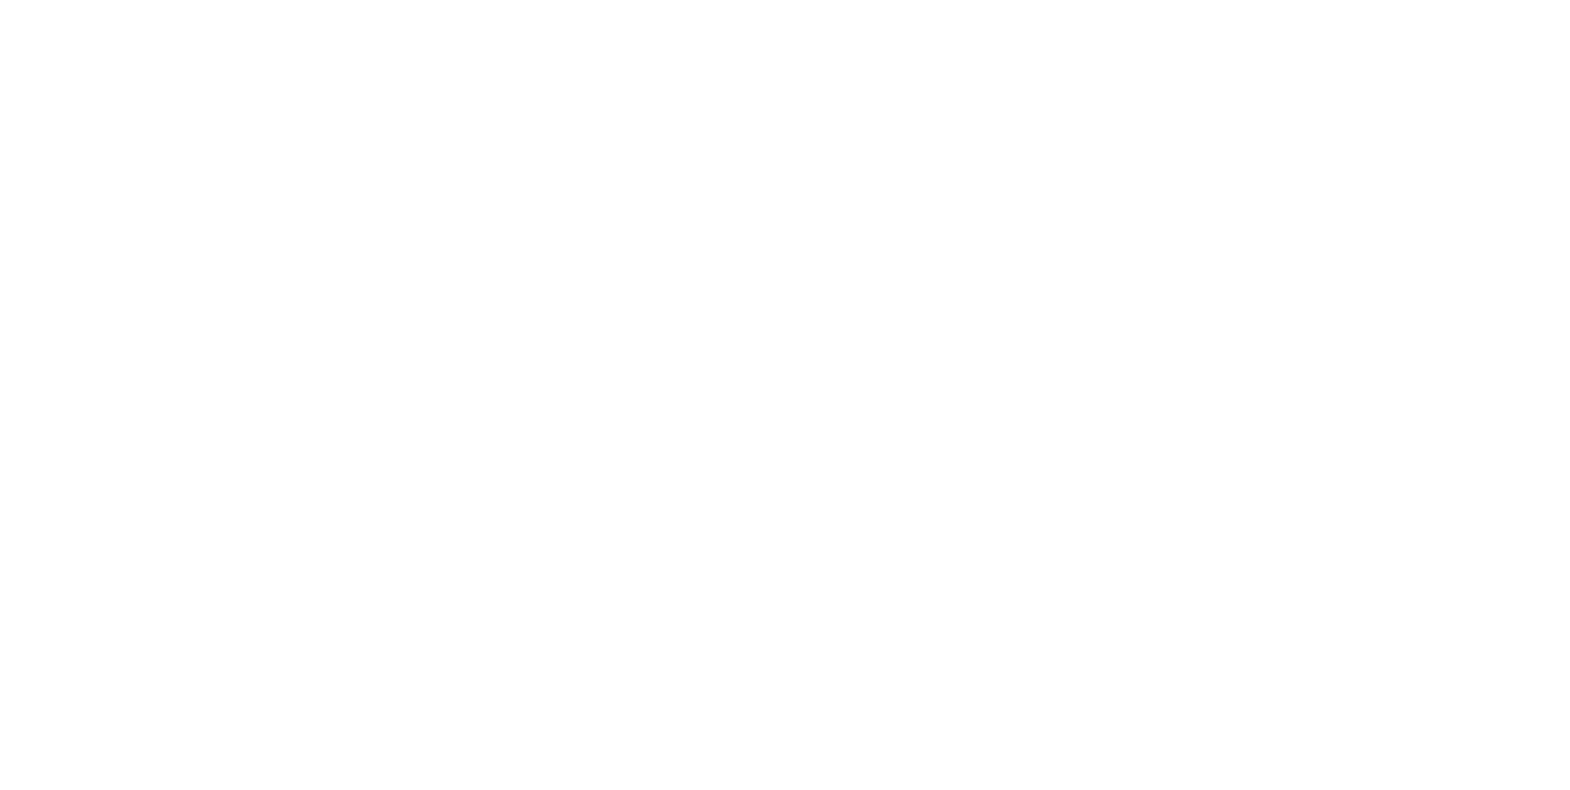

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ensure features list contains valid feature names
print("Number of features:", len(features))
print("Features:", features)

# Ensure decision tree model has been trained properly
print("Decision tree classes:", decision_tree_classifier.classes_)

# Plot the Decision Tree with error handling
plt.figure(figsize=(20, 10))
try:
    plot_tree(decision_tree_classifier, filled=True, feature_names=features, class_names=class_names, max_depth=3)
    plt.title("Decision Tree Classifier")
    plt.show()
except IndexError as e:
    print("IndexError:", e)
    print("Make sure the feature indices are within the valid range.")




In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# Selecting features and target variable
X = data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
          'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
          'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue']]
y = data['Response']  # Assuming 'Response' is the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing XGBoost classifier
xgb_model = XGBClassifier()

# Training the XGBoost model
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating classification report
report = classification_report(y_test, y_pred)
print("Classification Report for XGBoost:")
print(report)


Accuracy: 0.8660714285714286
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       379
           1       0.62      0.35      0.44        69

    accuracy                           0.87       448
   macro avg       0.75      0.65      0.68       448
weighted avg       0.85      0.87      0.85       448



In [72]:
from sklearn.metrics import confusion_matrix

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for XGBoost Classifier:")
print(conf_matrix)

Confusion Matrix for XGBoost Classifier:
[[364  15]
 [ 45  24]]


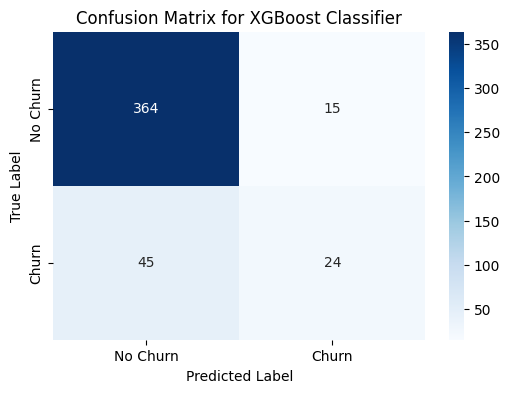

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()